In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel("Assingment_Dataset.xlsx")

# Cross Border Movement

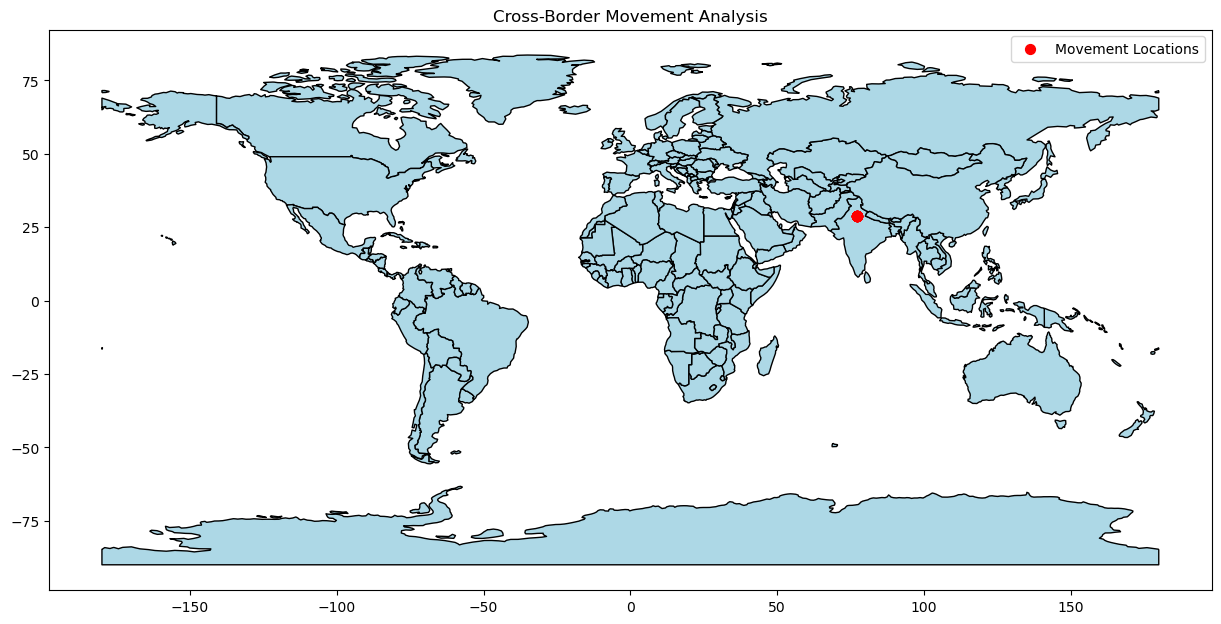

In [3]:
# loading dataset
data = df

# Convert 'Timestamp' to datetime for time-series analysis
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Step 1: Convert to a GeoDataFrame
geometry = gpd.points_from_xy(data['Longitude'], data['Latitude'])
geo_df = gpd.GeoDataFrame(data, geometry=geometry)

# Step 2: Plotting the movement on a static map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(15, 10), color='lightblue', edgecolor='black')

geo_df.plot(ax=ax, color='red', markersize=50, label='Movement Locations')
plt.title('Cross-Border Movement Analysis')
plt.legend()
plt.show()

# Step 3: Interactive Map with Folium
m = folium.Map(location=[data['Latitude'].mean(), data['Longitude'].mean()], zoom_start=6)

# Add markers for each point
for idx, row in data.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Location: {row['Location']}\nMovement: {row['Movement Type']}\nTimestamp: {row['Timestamp']}",
        icon=folium.Icon(color='blue' if row['Movement Type'] == 'Entry' else 'red')
    ).add_to(m)

# Step 4: Add a heatmap to identify hotspots
heat_data = [[row['Latitude'], row['Longitude']] for index, row in data.iterrows()]
HeatMap(heat_data).add_to(m)

# Save the map as an HTML file
m.save('cross_border_movement.html')
m
